In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_boston
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
df = pd.DataFrame(data['data'], columns=data.feature_names)
df['housing_price'] = data['target']

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,housing_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


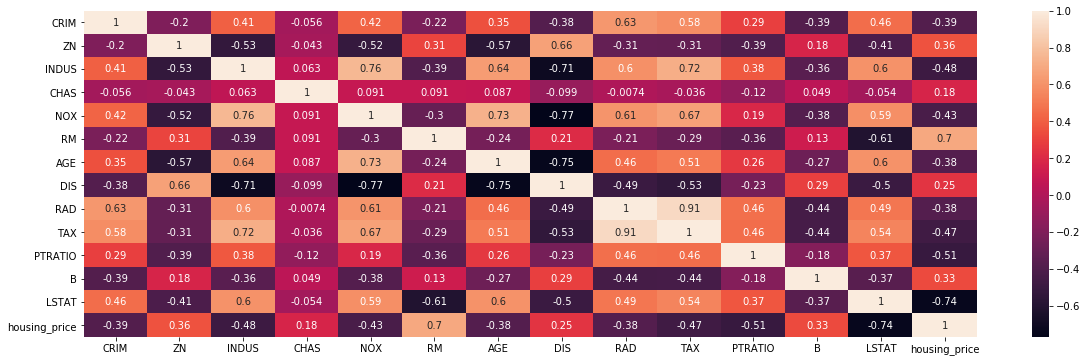

In [63]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.heatmap(df.corr(), annot=True);

- Neural net: Not effecting by colinearity

In [64]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'housing_price'],
      dtype='object')

In [66]:
columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT', 'housing_price']

In [7]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
df.isnull().sum()

CRIM             0
ZN               0
INDUS            0
CHAS             0
NOX              0
RM               0
AGE              0
DIS              0
RAD              0
TAX              0
PTRATIO          0
B                0
LSTAT            0
housing_price    0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Train test split

In [67]:
df = df[columns]

In [68]:
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, shuffle=True, random_state=4)

In [70]:
assert X_train.shape[0] == y_train.shape[0], 'Wrong training shape'
assert X_test.shape[0] == y_test.shape[0], 'Wrong testing shape'

## Training model

In [71]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1], )))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, validation_data=(X_test, y_test))

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set th

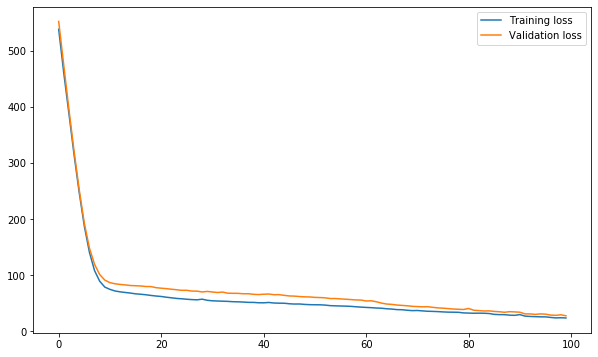

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(history.history.get('loss'), label='Training loss')
plt.plot(history.history.get('val_loss'), label='Validation loss')
plt.legend()
plt.show()

In [73]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 27.7196


27.71955680847168

In [74]:
model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


array([[18.969692 ],
       [20.473518 ],
       [19.906277 ],
       [20.008186 ],
       [36.656235 ],
       [26.694832 ],
       [28.25917  ],
       [15.523131 ],
       [13.9817915],
       [17.82882  ],
       [31.248295 ],
       [26.060463 ],
       [19.923779 ],
       [30.319899 ],
       [21.954449 ],
       [12.914184 ],
       [20.40126  ],
       [13.655517 ],
       [12.620561 ],
       [17.141262 ],
       [11.646876 ],
       [15.14448  ],
       [20.404526 ],
       [22.127607 ],
       [19.93473  ],
       [19.394667 ],
       [20.00737  ],
       [16.872349 ],
       [18.29215  ],
       [18.205696 ],
       [12.406062 ],
       [23.721529 ],
       [29.355225 ],
       [20.902016 ],
       [15.520915 ],
       [14.03118  ],
       [32.31307  ],
       [31.872566 ],
       [26.076336 ],
       [28.254612 ],
       [33.940018 ],
       [33.215195 ],
       [18.994978 ],
       [31.401417 ],
       [28.763746 ],
       [20.851704 ],
       [38.16939  ],
       [22.45